In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, f1_score, log_loss, precision_score, recall_score, confusion_matrix

# Import and prepare data

According to the given characteristics of the bio molecule, it is required to determine whether a biological response will be given ("Activity" - biological response or a signal transmission).

In [2]:
bioresponce = pd.read_csv('bioresponse.csv', header=0, sep=',')

In [3]:
bioresponce.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [4]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [5]:
target = bioresponce.Activity.values

In [6]:
bioresponce.drop(['Activity'], axis=1, inplace=True)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(bioresponce, 
                                                    target,  
                                                    test_size=0.25, 
                                                    random_state=1)

# Train  classifiers

In [8]:
# Classifiers: small/deep decision tree, random forest on small/deep trees
models = [
    DecisionTreeClassifier(random_state=1, max_depth=2), 
    DecisionTreeClassifier(random_state=1, max_depth=15),
    RandomForestClassifier(random_state=1, max_depth=2),
    RandomForestClassifier(random_state=1, max_depth=15),
]
models_name = ['Small decision tree', 
               'Deep decision tree', 
               'Random forest on small trees', 
               'Random forest on deep trees']

y_out_all_models = []
predict_probas = []
for model in models: 
    model.fit(x_train, y_train)
    y_out = model.predict(x_test)
    predict_pr = model.predict_proba(x_test)
    y_out_all_models.append(y_out)
    predict_probas.append(predict_pr)

# Metrics

In [9]:
metrics_result = []
for y_out in y_out_all_models: 
    accuracy = accuracy_score(y_test, y_out)
    precision = precision_score(y_test, y_out)
    recall = recall_score(y_test, y_out)
    log_loss_val = log_loss(y_test, y_out)
    f1 = f1_score(y_test, y_out)
    cm = confusion_matrix(y_test, y_out)
    metrics_result.append([accuracy, precision, recall, log_loss_val, f1, 
                           cm[0][0], cm[0][1], cm[1][0], cm[1][1]])

# Convert to DataFrame
metrics_result = pd.DataFrame(metrics_result, columns=['Accuracy', 
                                                        'Precision',
                                                        'Recall',
                                                        'Log loss', 
                                                        'F1-Score', 
                                                        'TN', 'FP', 'FN', 'TP'], 
                              index=models_name)

# Display the results
print(metrics_result)

                              Accuracy  Precision    Recall   Log loss  \
Small decision tree           0.751599   0.742268  0.838835   8.953274   
Deep decision tree            0.747335   0.775794  0.759223   9.106979   
Random forest on small trees  0.702559   0.697987  0.807767  10.720873   
Random forest on deep trees   0.813433   0.838645  0.817476   6.724562   

                              F1-Score   TN   FP   FN   TP  
Small decision tree           0.787603  273  150   83  432  
Deep decision tree            0.767419  310  113  124  391  
Random forest on small trees  0.748875  243  180   99  416  
Random forest on deep trees   0.827925  342   81   94  421  


In [10]:
metrics_result

,Accuracy,Precision,Recall,Log loss,F1-Score,TN,FP,FN,TP
Small decision tree,0.751599,0.742268,0.838835,8.953274,0.787603,273,150,83,432
Deep decision tree,0.747335,0.775794,0.759223,9.106979,0.767419,310,113,124,391
Random forest on small trees,0.702559,0.697987,0.807767,10.720873,0.748875,243,180,99,416
Random forest on deep trees,0.813433,0.838645,0.817476,6.724562,0.827925,342,81,94,421


# Precision-recall and ROC curves

In [11]:
curves = ['Precision-recall', 'ROC']
curves = {model : {curve : None for curve in curves} for model in models_name}

In [12]:
curves['Small decision tree']

{'Precision-recall': None, 'ROC': None}

In [13]:
for j,curve in enumerate (curves.keys()):
    curves[curve]['Precision-recall'] = precision_recall_curve(y_test, predict_probas[j][:,1])
    curves[curve]['ROC'] = roc_curve(y_test,  predict_probas[j][:,1])


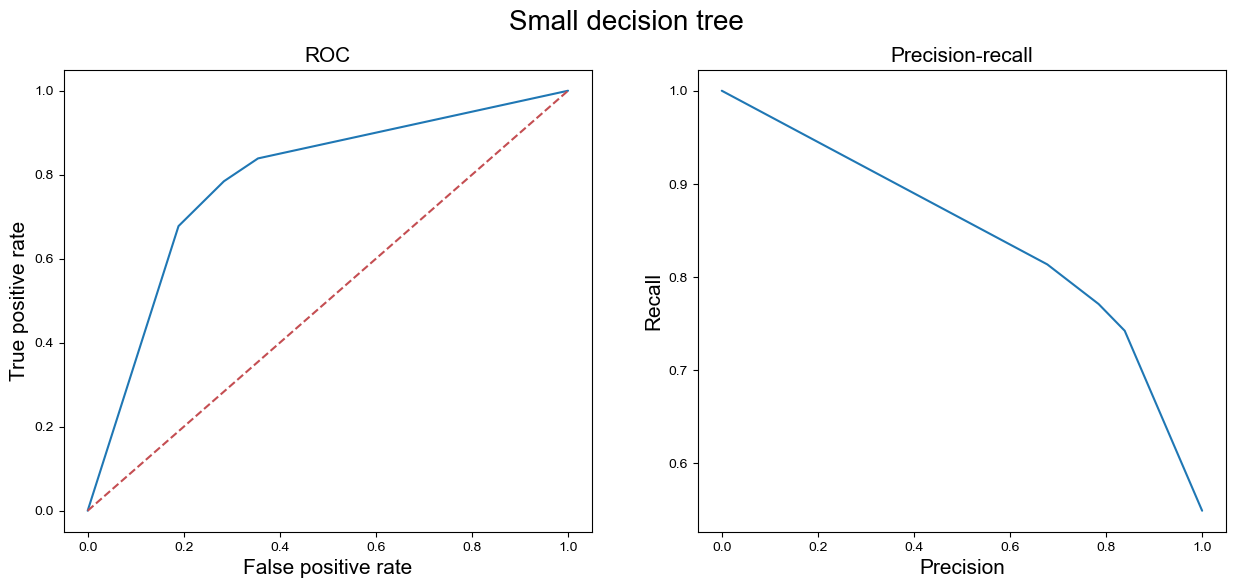

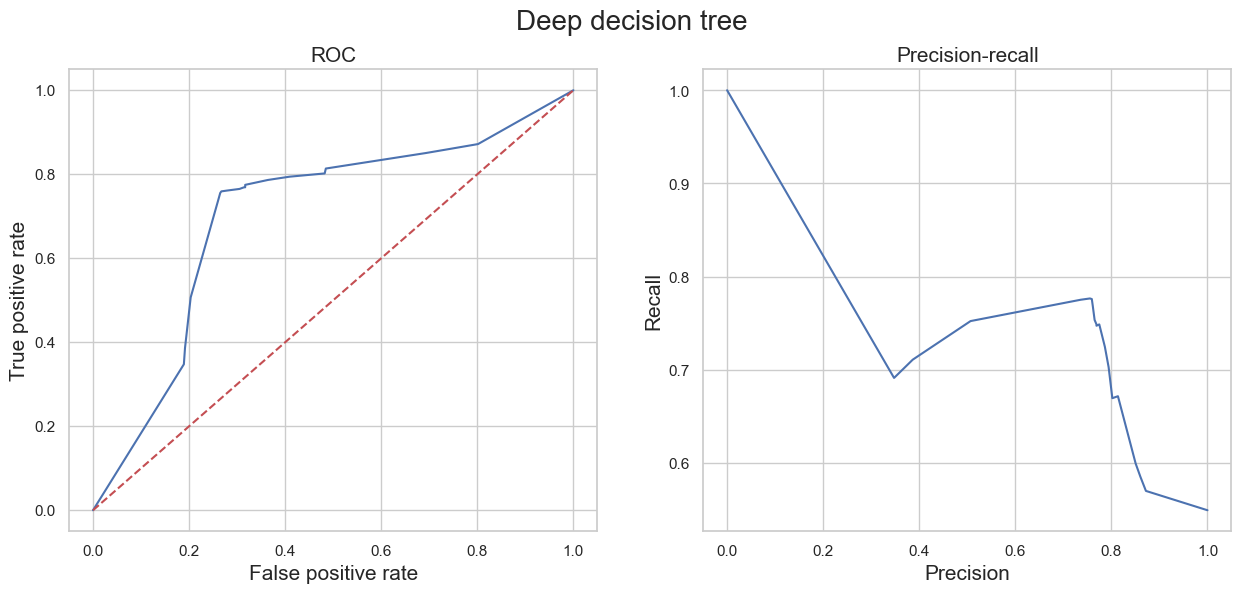

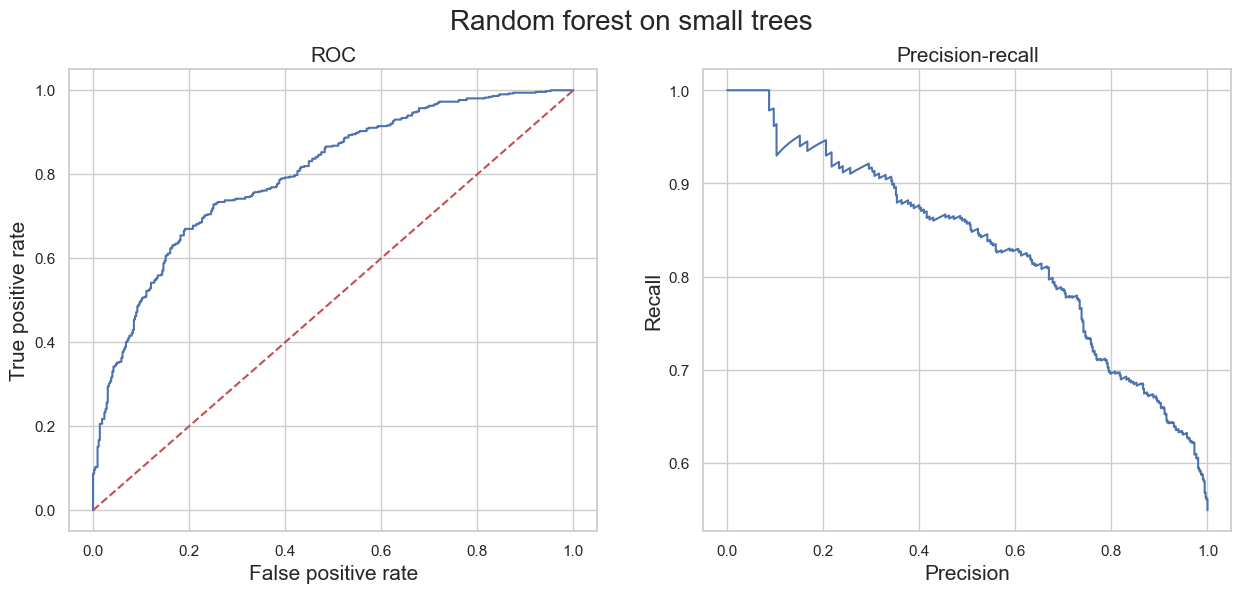

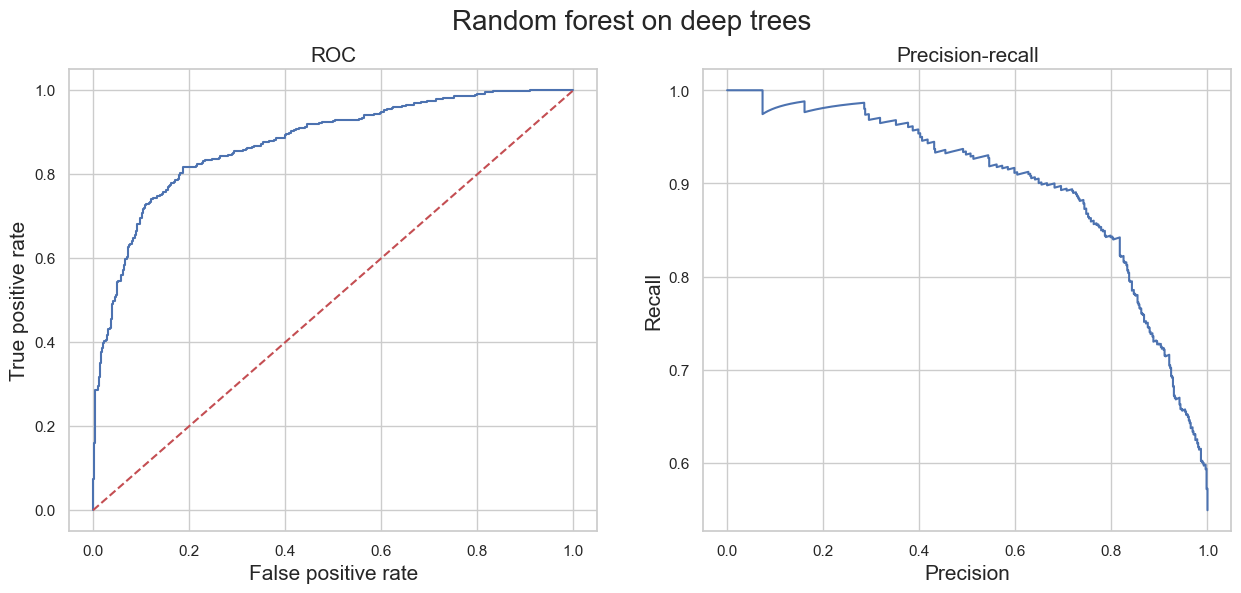

In [14]:
 for curve in curves.keys():
    figure, ax = plt.subplots(1, 2, figsize=(15, 6))
    figure.suptitle(curve, fontsize=20)
    sns.set_theme(style='whitegrid')
    axs = ax.ravel()
    pr_curve_roc= curves[curve]['ROC']
    pr_curve_recall = curves[curve]['Precision-recall']
    axs[0].plot(pr_curve_roc[0], pr_curve_roc[1])
    axs[0].plot(pr_curve_roc[1], pr_curve_roc[1], 'r--')
    axs[0].set_title('ROC', fontsize=15)
    axs[0].set_xlabel("False positive rate",fontsize = 15)
    axs[0].set_ylabel("True positive rate",fontsize = 15)
    axs[1].plot(pr_curve_recall[1], pr_curve_recall[0])
    axs[1].set_title('Precision-recall', fontsize=15)
    axs[1].set_xlabel("Precision",fontsize = 15)
    axs[1].set_ylabel("Recall",fontsize = 15)
    
  


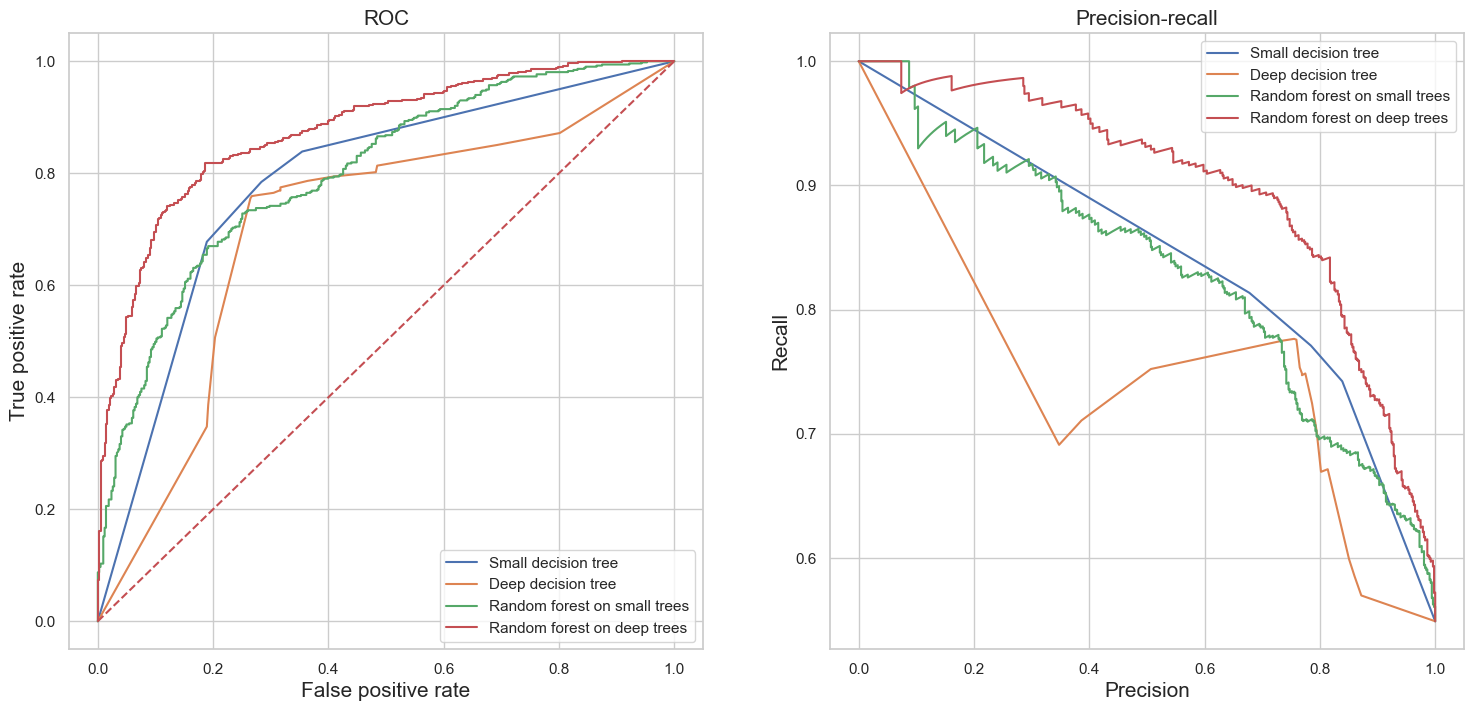

In [15]:

figure, ax = plt.subplots(1,2, figsize=(18,8))
sns.set_theme(style='whitegrid')
axs = ax.ravel()
for curve in curves.keys():
    pr_curve_roc= curves[curve]['ROC']
    pr_curve_recall = curves[curve]['Precision-recall']
    axs[0].plot(pr_curve_roc[0], pr_curve_roc[1])
    axs[0].set_title('ROC', fontsize=15)
    axs[0].set_xlabel("False positive rate",fontsize = 15)
    axs[0].set_ylabel("True positive rate",fontsize = 15)
    axs[1].plot(pr_curve_recall[1], pr_curve_recall[0])
    axs[1].set_title('Precision-recall', fontsize=15)
    axs[1].set_xlabel("Precision",fontsize = 15)
    axs[1].set_ylabel("Recall",fontsize = 15)
axs[1].legend(curves.keys())
axs[0].legend(curves.keys())
axs[0].plot(pr_curve_roc[1], pr_curve_roc[1], 'r--')

## **Analysis and Conclusions from ROC and Precision-Recall Curves**

## **1️⃣ Small Decision Tree**
- **ROC Curve**: The curve is relatively smooth, indicating weak class separation ability. However, the model still performs better than random guessing (diagonal line).
- **Precision-Recall Curve**: High precision at high recall values, but then a sharp decline.
- **Conclusion**: The small decision tree avoids overfitting but has limited classification capability due to its low depth.

---

## **2️⃣ Deep Decision Tree**
- **ROC Curve**: The curve exhibits sharp jumps, indicating potential overfitting to training data.
- **Precision-Recall Curve**: Unstable with drastic fluctuations in recall, further supporting the overfitting hypothesis.
- **Conclusion**: The deep decision tree overfits the data, meaning it learns the training set too well but struggles to generalize to new data.

---

## **3️⃣ Random Forest on Small Trees**
- **ROC Curve**: Smoother than single trees, demonstrating better class separation.
- **Precision-Recall Curve**: More stable, without sharp drops.
- **Conclusion**: Even with small trees, ensemble learning via random forests significantly improves model performance.

---

## **4️⃣ Random Forest on Deep Trees**
- **ROC Curve**: The best among all models, approaching 1.0 in the upper left corner, indicating strong classification ability.
- **Precision-Recall Curve**: Very stable, demonstrating excellent class separation.
- **Conclusion**: Using a random forest with deep trees provides the best results. The model maintains high accuracy without #severe overfitting.

---

# **General Recommendations**
✔ **Best trade-off** between accuracy and generalization is achieved with a **random forest with deep trees**.  
✔ **Single decision trees** are less effective: small trees underfit, while deep trees overfit.  
✔ **Random forest with small trees** also performs well but is slightly inferior to a deep-tree random forest.  

👉 **Model selection depends on the goal**: If interpretability is essential, a small tree is preferable, but for optimal classification, a deep-tree random forest is the best choice.


# Train a classifier avoiding Type II (False Negative) errors 

**V1**

In [16]:
# Classifiers with weight adjustments
models_with_weight = [
    DecisionTreeClassifier(random_state=1, max_depth=2, class_weight={0: 1., 1: 5.}), 
    DecisionTreeClassifier(random_state=1, max_depth=15, class_weight={0: 0.5, 1: 20.}),
    RandomForestClassifier(random_state=1, max_depth=2, class_weight={0: 0.5, 1: 5.}),
    RandomForestClassifier(random_state=1, max_depth=15, class_weight={0: 0.5, 1: 5.}),
]

y_out_all_models_with_weight = []
predict_probas_with_weight = []
for model in models_with_weight: 
    model.fit(x_train, y_train)
    y_out = model.predict(x_test)
    predict_pr = model.predict_proba(x_test)
    y_out_all_models_with_weight.append(y_out)
    predict_probas_with_weight.append(predict_pr)

metrics_result_with_weight = []
for y_out in y_out_all_models_with_weight: 
    accuracy = accuracy_score(y_test, y_out)
    precision = precision_score(y_test, y_out)
    recall = recall_score(y_test, y_out)
    log_loss_val = log_loss(y_test, y_out)
    f1 = f1_score(y_test, y_out)
    cm = confusion_matrix(y_test, y_out)
    metrics_result_with_weight.append([accuracy, precision, recall, log_loss_val, f1, 
                                       cm[0][0], cm[0][1], cm[1][0], cm[1][1]])

metrics_result_with_weight = pd.DataFrame(metrics_result_with_weight, 
                                          columns=['Accuracy', 'Precision', 'Recall', 'Log loss', 'F1-Score', 'TN', 'FP', 'FN', 'TP'], 
                                          index=models_name)


In [17]:
metrics_result_with_weight

,Accuracy,Precision,Recall,Log loss,F1-Score,TN,FP,FN,TP
Small decision tree,0.550107,0.549733,0.998058,16.215801,0.708966,2,421,1,514
Deep decision tree,0.623667,0.599265,0.949515,13.564403,0.734786,96,327,26,489
Random forest on small trees,0.549041,0.549041,1.000000,16.254227,0.708878,0,423,0,515
Random forest on deep trees,0.672708,0.634367,0.953398,11.796803,0.761831,140,283,24,491


**V2**

In [21]:
# Train a classifier who avoids Type II (False Negative) errors and ensures recall > 0.95
classifier = DecisionTreeClassifier(random_state=1, max_depth=10, class_weight={0: 1, 1: 10})
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Ensure recall is at least 0.95
while recall_score(y_test, y_pred) < 0.95:
    classifier.set_params(class_weight={0: 1, 1: classifier.get_params()['class_weight'][1] + 1})
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
log_loss_val = log_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Store results in DataFrame
metrics_result = pd.DataFrame([[accuracy, precision, recall, log_loss_val, f1, 
                                cm[0][0], cm[0][1], cm[1][0], cm[1][1]]],
                              columns=['Accuracy', 'Precision', 'Recall', 'Log loss', 'F1-Score', 'TN', 'FP', 'FN', 'TP'],
                              index=['Decision Tree (Avoid Type II Errors)'])




In [22]:
metrics_result

,Accuracy,Precision,Recall,Log loss,F1-Score,TN,FP,FN,TP
Decision Tree (Avoid Type II Errors),0.627932,0.600728,0.961165,13.410698,0.739358,94,329,20,495
